# Credit Card Fraud detection


In [1]:
# Install dependencies as needed:
# pip install kagglehub[pandas-datasets]
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the path to the file you'd like to load
file_path = "creditcard.csv"

# Load the latest version
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "whenamancodes/fraud-detection",
  file_path,
 
)


/var/folders/ps/68jpr1q55f928tjt2p5w21r80000gn/T/ipykernel_79485/2294360669.py:10: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  df = kagglehub.load_dataset(


In [2]:
import pandas as pd
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix

In [3]:
df.head()  # Display the first 5 records

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## About the data
About Data
The dataset contains transactions made by credit cards in September 2013 by European cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

Given the class imbalance ratio, we recommend measuring the accuracy using the Area Under the Precision-Recall Curve (AUPRC). Confusion matrix accuracy is not meaningful for unbalanced classification.

In [4]:
df.info() 
df.describe() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


Number of fraud cases: 492
Number of non-fraud cases: 284315
Percentage of fraud cases: 0.1727485630620034
Percentage of non-fraud cases: 99.82725143693798


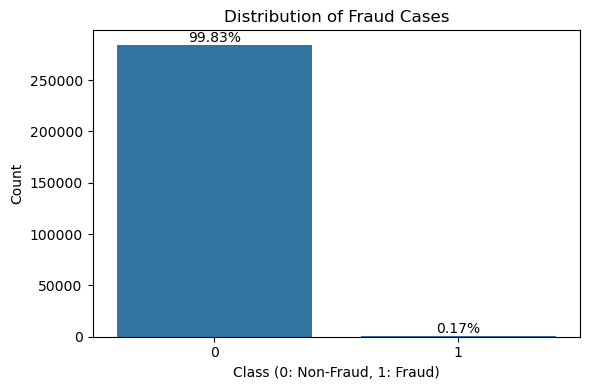

In [5]:
# imbalance in the dataset
print("Number of fraud cases:", df[df['Class'] == 1].shape[0])
print("Number of non-fraud cases:", df[df['Class'] == 0].shape[0])
print("Percentage of fraud cases:", (df[df['Class'] == 1].shape[0] / df.shape[0]) * 100)
print("Percentage of non-fraud cases:", (df[df['Class'] == 0].shape[0] / df.shape[0]) * 100)
#plotting the distribution of the target variable
plt.figure(figsize=(6, 4))
ax = sns.countplot(x='Class', data=df)
total = len(df)
for p in ax.patches:
    count = p.get_height()
    pct = count / total * 100
    
    ax.annotate(
        f'{pct:.2f}%',
        (p.get_x() + p.get_width() / 2, count),
        ha='center', va='bottom'
    )
plt.title('Distribution of Fraud Cases')
plt.xlabel('Class (0: Non-Fraud, 1: Fraud)')
plt.ylabel('Count')
plt.tight_layout()
plt.show()




We can clearly see that the data is clearly imbalanced. As per my understanding, we are trying to make a model that would be used to identify fraud reports, which means we want to reduce chances where model predicts not fraud but they were actually fraud. Hence, we are trying to reduce false negatives. Therefore, I am going to use oversampling technique using SMOTE

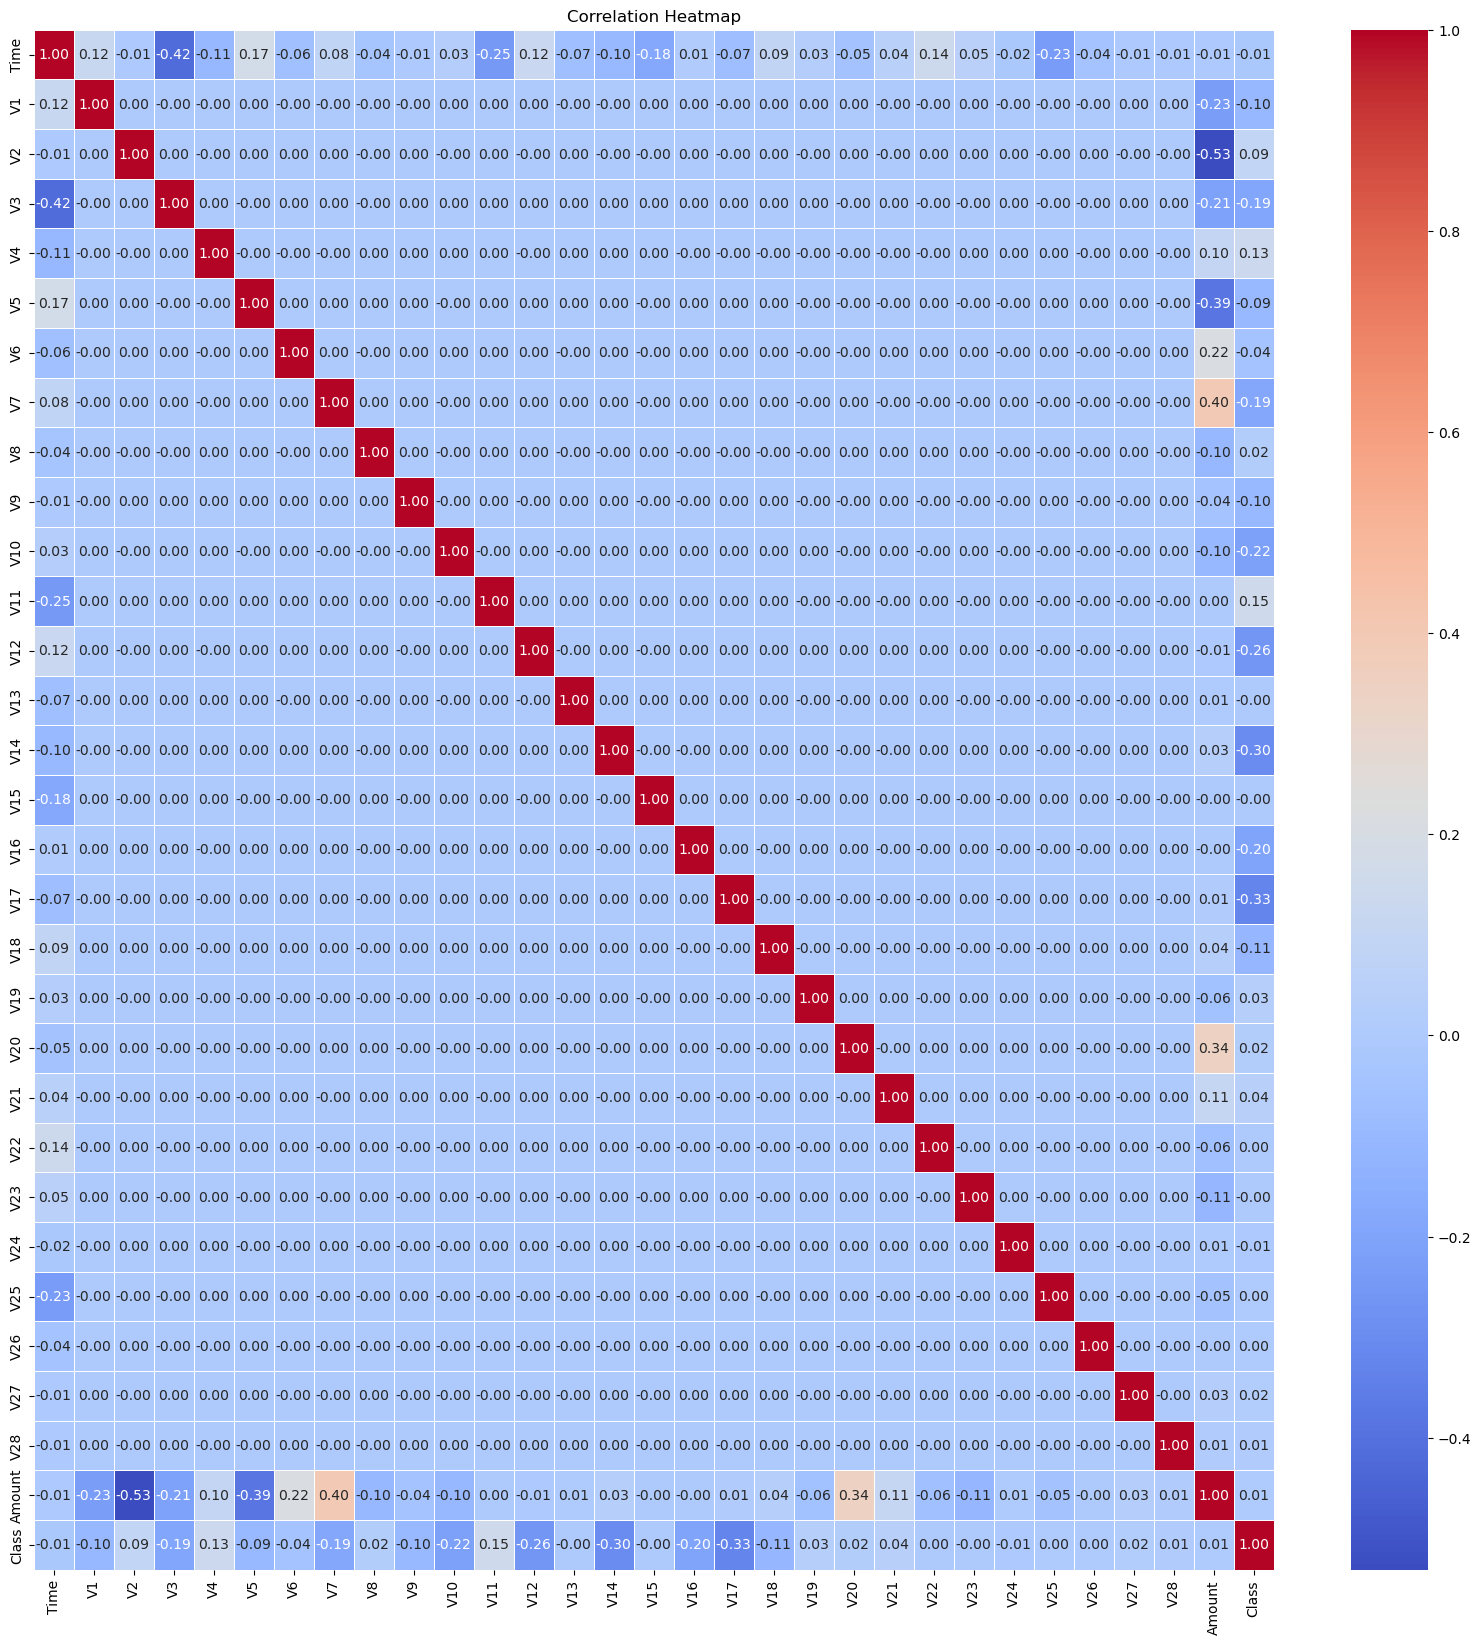

In [6]:
#heatmap
plt.figure(figsize=(20, 20))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()  


as we can see most features do not co-relate with each other and few features do not relase with the class as well

In [7]:
df = df.sample(frac=1, random_state=42).reset_index(drop=True)  # Shuffle the dataset
features = df.iloc[:, df.columns != 'Class']  # All columns except 'Class'
target = df['Class']  # 'Class' column as target variable
print("Features and target sizes, respectively:", len(features), len(target))
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.35, random_state=42)
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
print("Size of training set after over sampling:", len(X_train_resampled))


Features and target sizes, respectively: 284807 284807
Size of training set after over sampling: 369598


In [8]:
# Logistic Model
logistic_model = linear_model.LogisticRegression(max_iter=1000)
logistic_model.fit(X_train_resampled, y_train_resampled)
y_train_pred = logistic_model.predict(X_train_resampled)
y_test_pred = logistic_model.predict(X_test)


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [9]:
train_accuracy = accuracy_score(y_train_resampled, y_train_pred)
train_f1 = f1_score(y_train_resampled, y_train_pred)
train_precision = precision_score(y_train_resampled, y_train_pred)
train_recall = recall_score(y_train_resampled, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
print("Logistic Regression Model Metrics:")
print("------------------------------------------")
print("Training Set Metrics:")
print(f"Accuracy: {train_accuracy:.4f}")
print(f"F1 Score: {train_f1:.4f}")
print(f"Precision: {train_precision:.4f}")
print(f"Recall: {train_recall:.4f}")

print("------------------------------------------")

print("\nTest Set Metrics:")
print(f"Accuracy: {test_accuracy:.4f}")
print(f"F1 Score: {test_f1:.4f}")
print(f"Precision: {test_precision:.4f}")
print(f"Recall: {test_recall:.4f}")


Logistic Regression Model Metrics:
------------------------------------------
Training Set Metrics:
Accuracy: 0.9795
F1 Score: 0.9793
Precision: 0.9885
Recall: 0.9703
------------------------------------------

Test Set Metrics:
Accuracy: 0.9884
F1 Score: 0.2060
Precision: 0.1164
Recall: 0.8982


as we can see, f1 score is very low and seeing precision and recall, it seems like the model is generalizing everything as fraud.

In [10]:
# Random Forest Model
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42) 
rf_model.fit(X_train_resampled, y_train_resampled)
y_train_pred= rf_model.predict(X_train_resampled)
y_test_pred = rf_model.predict(X_test)

In [11]:
train_accuracy = accuracy_score(y_train_resampled, y_train_pred)
train_f1 = f1_score(y_train_resampled, y_train_pred)
train_precision = precision_score(y_train_resampled, y_train_pred)
train_recall = recall_score(y_train_resampled, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
print("Random Forest Model Metrics:")
print("------------------------------------------")
print("Training Set Metrics:")
print(f"Accuracy: {train_accuracy:.4f}")
print(f"F1 Score: {train_f1:.4f}")
print(f"Precision: {train_precision:.4f}")
print(f"Recall: {train_recall:.4f}")

print("------------------------------------------")

print("\nTest Set Metrics:")
print(f"Accuracy: {test_accuracy:.4f}")
print(f"F1 Score: {test_f1:.4f}")
print(f"Precision: {test_precision:.4f}")
print(f"Recall: {test_recall:.4f}")

Random Forest Model Metrics:
------------------------------------------
Training Set Metrics:
Accuracy: 1.0000
F1 Score: 1.0000
Precision: 1.0000
Recall: 1.0000
------------------------------------------

Test Set Metrics:
Accuracy: 0.9996
F1 Score: 0.8667
Precision: 0.8773
Recall: 0.8563


In [12]:
#grid search for hyperparameter tuning
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'class_weight': [None, 'Balanced', 'balanced_subsample']
}
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, scoring='f1', cv=5, verbose=2, n_jobs=-1)
grid_search.fit(X_train_resampled, y_train_resampled)
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print("Best Parameters:", best_params)
print("Best F1 Score:", best_score) 

Fitting 5 folds for each of 324 candidates, totalling 1620 fits
[CV] END class_weight=None, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time= 1.7min
[CV] END class_weight=None, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time= 1.7min
[CV] END class_weight=None, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time= 1.7min
[CV] END class_weight=None, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time= 1.7min
[CV] END class_weight=None, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time= 1.7min
[CV] END class_weight=None, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time= 3.3min
[CV] END class_weight=None, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time= 3.3min
[CV] END class_weight=None, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_

/opt/anaconda3/lib/python3.12/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[CV] END class_weight=Balanced, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END class_weight=Balanced, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END class_weight=Balanced, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END class_weight=Balanced, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END class_weight=Balanced, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END class_weight=Balanced, max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=50; total time=   0.0s
[CV] END class_weight=Balanced, max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=50; total time=   0.0s
[CV] END class_weight=Balanced, max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=50; total time=

/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
540 fits failed out of a total of 1620.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
215 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/opt/anaconda3/lib/python3.12/site-

Best Parameters: {'class_weight': 'balanced_subsample', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}
Best F1 Score: 0.9998836722450719


In [13]:
print("Best Parameters:", best_params)
print("Best F1 Score:", best_score)

Best Parameters: {'class_weight': 'balanced_subsample', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}
Best F1 Score: 0.9998836722450719


In [14]:
# after grid_search.fit(…)
rf_best = grid_search.best_estimator_
rf_best.fit(X_train_resampled, y_train_resampled)


RandomForestClassifier(class_weight='balanced_subsample', min_samples_split=5,
                       n_estimators=50, random_state=42)

In [15]:
y_train_pred_best = rf_best.predict(X_train_resampled)
y_test_pred_best  = rf_best.predict(X_test)


In [16]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

train_accuracy  = accuracy_score(y_train_resampled, y_train_pred_best)
train_f1        = f1_score(       y_train_resampled, y_train_pred_best)
train_precision = precision_score(y_train_resampled, y_train_pred_best)
train_recall    = recall_score(   y_train_resampled, y_train_pred_best)

test_accuracy   = accuracy_score(y_test, y_test_pred_best)
test_f1         = f1_score(       y_test, y_test_pred_best)
test_precision  = precision_score(y_test, y_test_pred_best)
test_recall     = recall_score(   y_test, y_test_pred_best)

print("Random Forest (Grid‑Search Best) Metrics")
print("─" * 40)
print("Training Set:")
print(f"  Accuracy : {train_accuracy:.4f}")
print(f"  F1 Score : {train_f1:.4f}")
print(f"  Precision: {train_precision:.4f}")
print(f"  Recall   : {train_recall:.4f}")
print("\nTest Set:")
print(f"  Accuracy : {test_accuracy:.4f}")
print(f"  F1 Score : {test_f1:.4f}")
print(f"  Precision: {test_precision:.4f}")
print(f"  Recall   : {test_recall:.4f}")


Random Forest (Grid‑Search Best) Metrics
────────────────────────────────────────
Training Set:
  Accuracy : 1.0000
  F1 Score : 1.0000
  Precision: 1.0000
  Recall   : 1.0000

Test Set:
  Accuracy : 0.9996
  F1 Score : 0.8659
  Precision: 0.8820
  Recall   : 0.8503


In [19]:
print("Best CV F1:",    grid_search.best_score_)
print("Best parameters:", grid_search.best_params_)


Best CV F1: 0.9998836722450719
Best parameters: {'class_weight': 'balanced_subsample', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}


In [20]:
best_rf = grid_search.best_estimator_


In [22]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

# Training metrics
y_train_pred = best_rf.predict(X_train_resampled)
print("Training Set Metrics (Best RF):")
print("  Accuracy :", accuracy_score(y_train_resampled, y_train_pred))
print("  F1 Score :", f1_score(y_train_resampled, y_train_pred))
print("  Precision:", precision_score(y_train_resampled, y_train_pred))
print("  Recall   :", recall_score(y_train_resampled, y_train_pred))

# Test metrics
y_test_pred = best_rf.predict(X_test)
print("\nTest Set Metrics (Best RF):")
print("  Accuracy :", accuracy_score(y_test, y_test_pred))
print("  F1 Score :", f1_score(y_test, y_test_pred))
print("  Precision:", precision_score(y_test, y_test_pred))
print("  Recall   :", recall_score(y_test, y_test_pred))


Training Set Metrics (Best RF):
  Accuracy : 1.0
  F1 Score : 1.0
  Precision: 1.0
  Recall   : 1.0

Test Set Metrics (Best RF):
  Accuracy : 0.9995586007644233
  F1 Score : 0.8658536585365854
  Precision: 0.8819875776397516
  Recall   : 0.8502994011976048


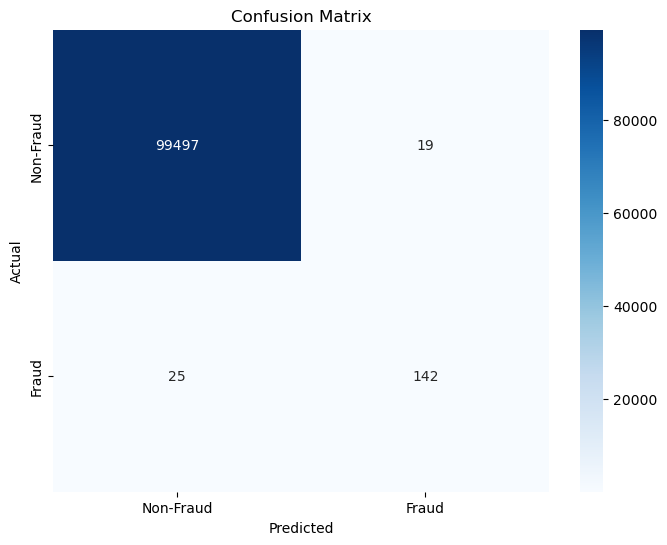

Best CV F1:      0.9998836722450719
Best parameters: {'class_weight': 'balanced_subsample', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}
Best estimator: RandomForestClassifier(class_weight='balanced_subsample', min_samples_split=5,
                       n_estimators=50, random_state=42)


In [25]:
# Plotting confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Non-Fraud', 'Fraud'],
            yticklabels=['Non-Fraud', 'Fraud'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
print("Best CV F1:     ", grid_search.best_score_)
print("Best parameters:", grid_search.best_params_)
print("Best estimator:", grid_search.best_estimator_)


# PROJECT SUMMARY
#### The project involved building a credit card fraud detection system using machine learning techniques.
#### The dataset was imbalanced, with a small percentage of fraud cases.
#### The data was preprocessed, including shuffling and oversampling using SMOTE.
#### Two models were built: a Logistic Regression model and a Random Forest model.
#### The Random Forest model was further optimized using Grid Search for hyperparameter tuning.